In [4]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
url = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-01-21/data/listings.csv.gz"
response = requests.get(url)
bytes_io = io.BytesIO(response.content)
with gzip.open(bytes_io, 'rt') as read_file:
    ds = pd.read_csv(read_file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print(ds.shape)

(34754, 106)


In [7]:
ds.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200121213543,2020-01-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$63.00,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,2020-01-22,246,26,2010-07-15,2019-12-22,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.12
1,21280,https://www.airbnb.com/rooms/21280,20200121213543,2020-01-22,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,NaN,The new metro station is just a few steps away...,"This is an older ""Art Deco"" style building, so...",Someone will be there at check in and check ou...,This is a booking agreement for rental of a tw...,NaN,NaN,https://a0.muscache.com/im/pictures/60851312/b...,NaN,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,...,$0.00,5,30,5,5,30,30,5.0,30.0,3 weeks ago,t,6,12,12,12,2020-01-22,89,1,2014-02-14,2020-01-04,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200121213543,2020-01-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...

In [0]:
ds = ds.drop(['id', 'listing_url','scrape_id', 'last_scraped', 'name','summary', 'space', 'description', 'neighborhood_overview', 'notes','transit','access','interaction','house_rules',
              'thumbnail_url','medium_url', 'picture_url','xl_picture_url','host_id','host_url','host_name', 'host_about','host_thumbnail_url','host_picture_url', 'host_verifications',
              'calendar_last_scraped','first_review','last_review','license','jurisdiction_names', 'cancellation_policy','zipcode'], axis=1)

In [9]:
ds.head(5)

,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,none,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,100%,NaN,t,Copacabana,2.0,2.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,NaN,NaN,$0.00,$378.00,2,$63.00,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,246,26,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,t,f,f,f,1,1,0,0,2.12
1,none,2010-02-14,"Chicago, Illinois, United States",within an hour,100%,NaN,f,Ipanema,0.0,0.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,NaN,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98467,-43.19611,t,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$336.00,"$3,920.00","$13,836.00","$2,098.00",$210.00,6,$0.00,5,30,5,5,30,30,5.0,30.0,3 weeks ago,t,6,12,12,12,89,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,f,f,1,1,0,0,1.23
2,none,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within a day,86%,NaN,f,Copacabana,3.0,3.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.97712,-43.19045,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$159.00,NaN,NaN,"$1,000.00",$250.00,2,$45.00,7,60,7,7,60,60,7.0,60.0,3 days ago,t,13,16,16,21,237,15,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,f,f,t,t,3,3,0,0,2.02
3,none,2010-05-31,"Rio de Janeiro, Rio de Janeiro, Brazil",within an hour,100%,NaN,t,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,NaN,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$273.00,NaN,NaN,$0.00,$84.00,2,$42.00,2,1125,2,5,1125,1125,2.0,1125.0,2 weeks ago,t,0,12,40,130,277,39,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,f,f,1,1,0,0,2.39
4,none,2010-06-27,"San Carlos de Bariloche, Rio Negro, Argentina",within an hour,100%,NaN,f,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Ipanema,Ipanema,NaN,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98816,-43.19359,t,Apartment,Entire home/apt,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$378.00,NaN,"$9,652.00","$1,049.00",$172.00,2,$63.00,2,89,2,2,89,89,2.0,89.0,4 months ago,t,2,13,24,108,174,35,94.0,10.0,9.0,10.0,

In [10]:
print(ds.shape)


(34754, 74)


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34754 entries, 0 to 34753
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   experiences_offered                           34754 non-null  object 
 1   host_since                                    34749 non-null  object 
 2   host_location                                 34577 non-null  object 
 3   host_response_time                            22847 non-null  object 
 4   host_response_rate                            22847 non-null  object 
 5   host_acceptance_rate                          0 non-null      float64
 6   host_is_superhost                             34749 non-null  object 
 7   host_neighbourhood                            22505 non-null  object 
 8   host_listings_count                           34749 non-null  float64
 9   host_total_listings_count                     34749 non-null 

In [0]:
ds = ds.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed'], axis=1)

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34754 entries, 0 to 34753
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   experiences_offered                           34754 non-null  object 
 1   host_since                                    34749 non-null  object 
 2   host_location                                 34577 non-null  object 
 3   host_response_time                            22847 non-null  object 
 4   host_response_rate                            22847 non-null  object 
 5   host_is_superhost                             34749 non-null  object 
 6   host_neighbourhood                            22505 non-null  object 
 7   host_listings_count                           34749 non-null  float64
 8   host_total_listings_count                     34749 non-null  float64
 9   host_has_profile_pic                          34749 non-null 

In [0]:
def remove_simbolo_monetario(x):
    a =  x[1:] #remove apenas um caracter
    result = ""
    for i in a:
        if i.isdigit() is True:
            result = result + i
    return result #retorna os digíto, sem o símbolo

ds["price"] = pd.to_numeric(ds["price"].apply(remove_simbolo_monetario), errors= "ignore")
ds["extra_people"] = pd.to_numeric(ds["extra_people"].apply(remove_simbolo_monetario), errors= "ignore")

In [0]:
ds['bed_type'] = ds.bed_type.astype('category')
ds['bed_type'].cat.categories
ds['bed_type'] = ds['bed_type'].cat.codes

In [16]:
ds.head(5)

,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,none,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,100%,t,Copacabana,2.0,2.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,33200,NaN,NaN,$0.00,$378.00,2,6300,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,246,26,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,t,f,f,f,1,1,0,0,2.12
1,none,2010-02-14,"Chicago, Illinois, United States",within an hour,100%,f,Ipanema,0.0,0.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98467,-43.19611,t,Apartment,Entire home/apt,6,2.0,2.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,33600,"$3,920.00","$13,836.00","$2,098.00",$210.00,6,0,5,30,5,5,30,30,5.0,30.0,3 weeks ago,t,6,12,12,12,89,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,f,f,1,1,0,0,1.23
2,none,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within a day,86%,f,Copacabana,3.0,3.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.97712,-43.19045,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,15900,NaN,NaN,"$1,000.00",$250.00,2,4500,7,60,7,7,60,60,7.0,60.0,3 days ago,t,13,16,16,21,237,15,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,f,f,t,t,3,3,0,0,2.02
3,none,2010-05-31,"Rio de Janeiro, Rio de Janeiro, Brazil",within an hour,100%,t,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,27300,NaN,NaN,$0.00,$84.00,2,4200,2,1125,2,5,1125,1125,2.0,1125.0,2 weeks ago,t,0,12,40,130,277,39,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,f,f,1,1,0,0,2.39
4,none,2010-06-27,"San Carlos de Bariloche, Rio Negro, Argentina",within an hour,100%,f,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Ipanema,Ipanema,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98816,-43.19359,t,Apartment,Entire home/apt,2,1.5,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,37800,NaN,"$9,652.00","$1,049.00",$172.00,2,6300,2,89,2,2,89,89,2.0,89.0,4 months ago,t,2,13,24,108,174,35,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,t,t,1,1,0,0,2.29


In [0]:
ds['room_type'] = ds.room_type.astype('category')
ds['room_type'].cat.categories
ds['room_type'] = ds['room_type'].cat.codes

In [18]:
ds.head(5)

,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,none,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,100%,t,Copacabana,2.0,2.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,0,5,1.0,2.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,33200,NaN,NaN,$0.00,$378.00,2,6300,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,246,26,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,t,f,f,f,1,1,0,0,2.12
1,none,2010-02-14,"Chicago, Illinois, United States",within an hour,100%,f,Ipanema,0.0,0.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98467,-43.19611,t,Apartment,0,6,2.0,2.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,33600,"$3,920.00","$13,836.00","$2,098.00",$210.00,6,0,5,30,5,5,30,30,5.0,30.0,3 weeks ago,t,6,12,12,12,89,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,f,f,1,1,0,0,1.23
2,none,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within a day,86%,f,Copacabana,3.0,3.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.97712,-43.19045,t,Apartment,0,2,1.0,1.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,15900,NaN,NaN,"$1,000.00",$250.00,2,4500,7,60,7,7,60,60,7.0,60.0,3 days ago,t,13,16,16,21,237,15,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,f,f,t,t,3,3,0,0,2.02
3,none,2010-05-31,"Rio de Janeiro, Rio de Janeiro, Brazil",within an hour,100%,t,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98302,-43.21427,t,Apartment,0,3,1.0,1.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,27300,NaN,NaN,$0.00,$84.00,2,4200,2,1125,2,5,1125,1125,2.0,1125.0,2 weeks ago,t,0,12,40,130,277,39,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,f,f,1,1,0,0,2.39
4,none,2010-06-27,"San Carlos de Bariloche, Rio Negro, Argentina",within an hour,100%,f,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Ipanema,Ipanema,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98816,-43.19359,t,Apartment,0,2,1.5,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,37800,NaN,"$9,652.00","$1,049.00",$172.00,2,6300,2,89,2,2,89,89,2.0,89.0,4 months ago,t,2,13,24,108,174,35,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,t,t,1,1,0,0,2.29


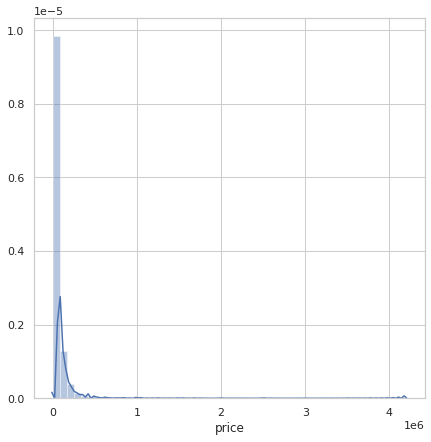

In [19]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["price"])

In [0]:
q1 = ds["price"].quantile(0.25)
q3 = ds["price"].quantile(0.75)
IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [21]:
ds = ds[~((ds["price"] < IF) | (ds["price"] > OF))]
ds.shape

(31471, 72)

count     31471.000000
mean      35735.887007
std       28562.490524
min           0.000000
25%       15100.000000
50%       25200.000000
75%       49500.000000
max      126700.000000
Name: price, dtype: float64


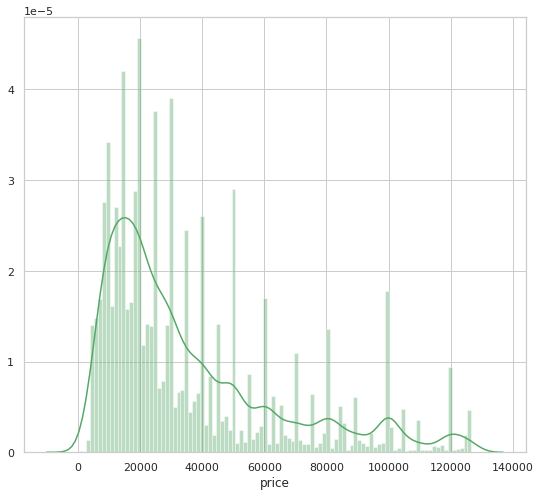

In [22]:
print(ds['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(ds['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [23]:
list(set(ds.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int8'), dtype('int64')]

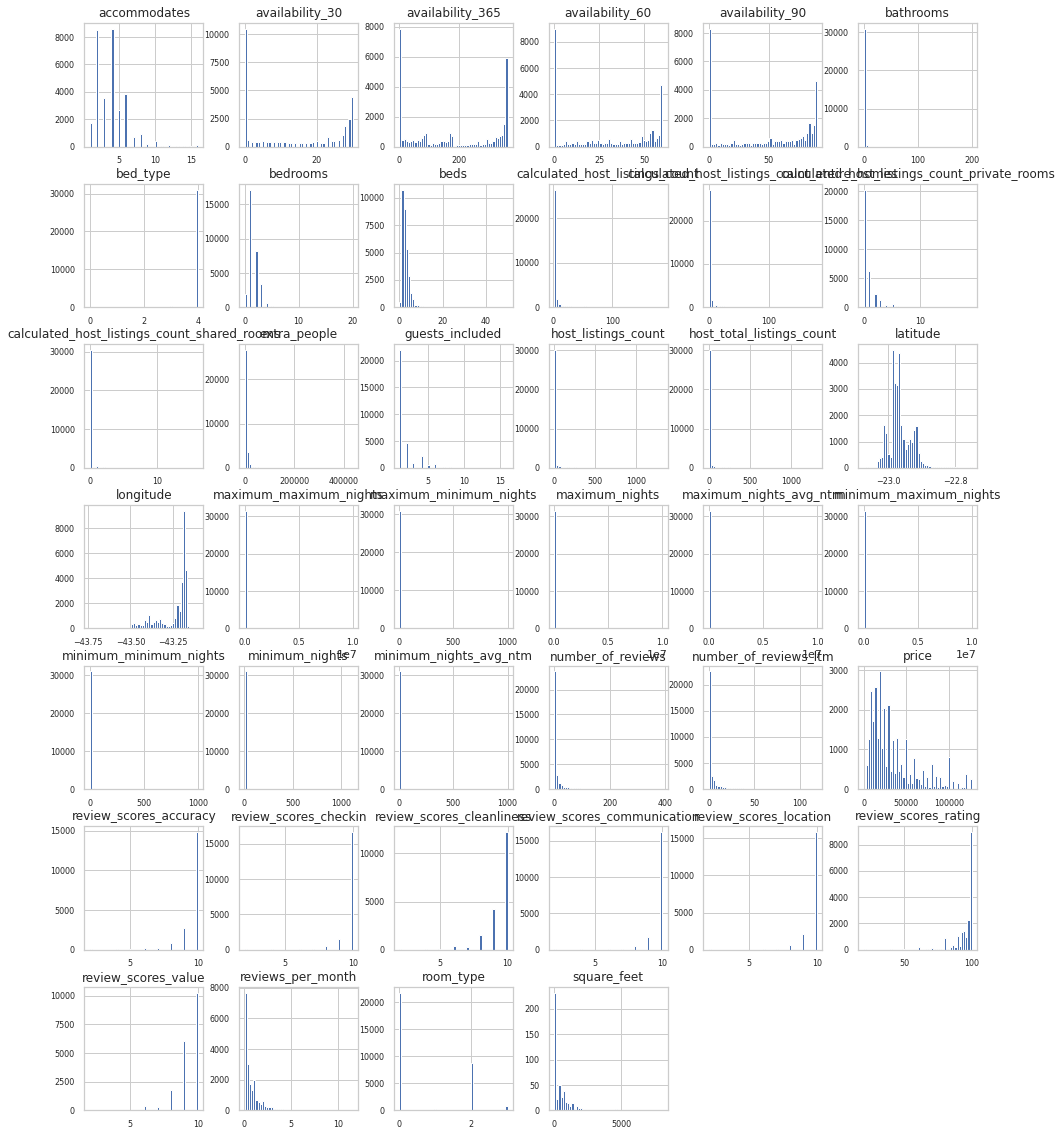

In [24]:
df_num = ds.select_dtypes(include = ['float64', 'int64', 'int8'])

df_num.head()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [25]:
df_num_corr = df_num.corr()['price'][:-1] # -1 pois a última linha é a Price
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with price:\n{}".format(len(golden_features_list), golden_features_list))

There is 13 strongly correlated values with price:
price                                           1.000000
bedrooms                                        0.436359
accommodates                                    0.390812
square_feet                                     0.354249
beds                                            0.255648
bathrooms                                       0.222481
guests_included                                 0.104676
longitude                                      -0.131013
number_of_reviews                              -0.169648
calculated_host_listings_count_private_rooms   -0.178112
latitude                                       -0.183757
number_of_reviews_ltm                          -0.197525
room_type                                      -0.327253
Name: price, dtype: float64


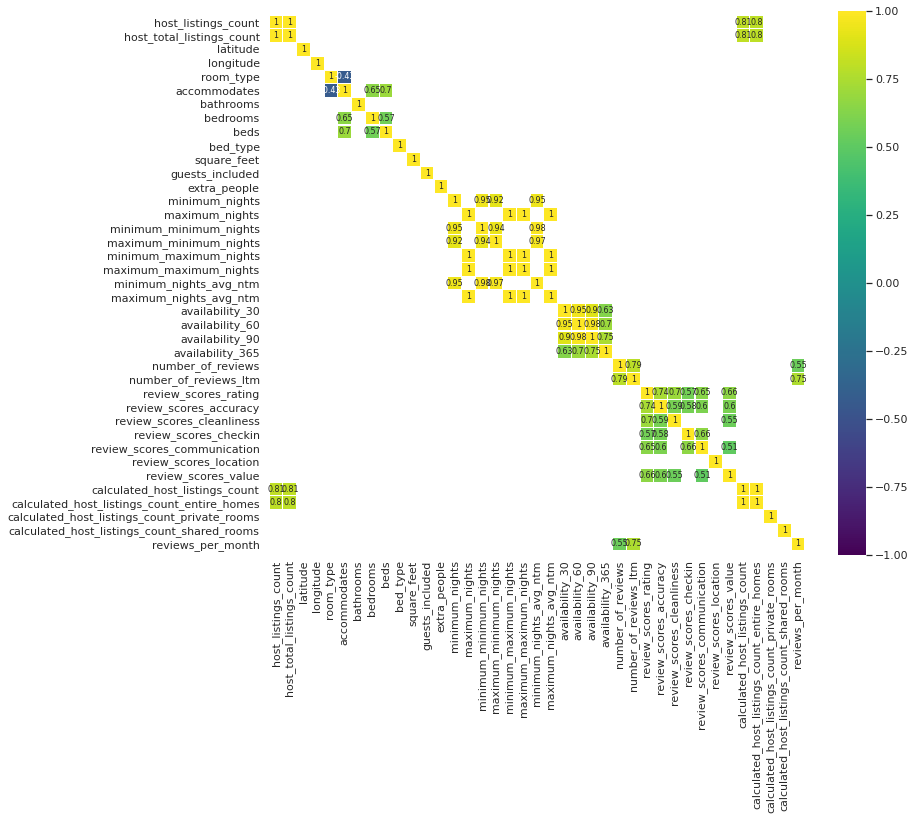

In [26]:
import seaborn as sns

corr = df_num.drop('price', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

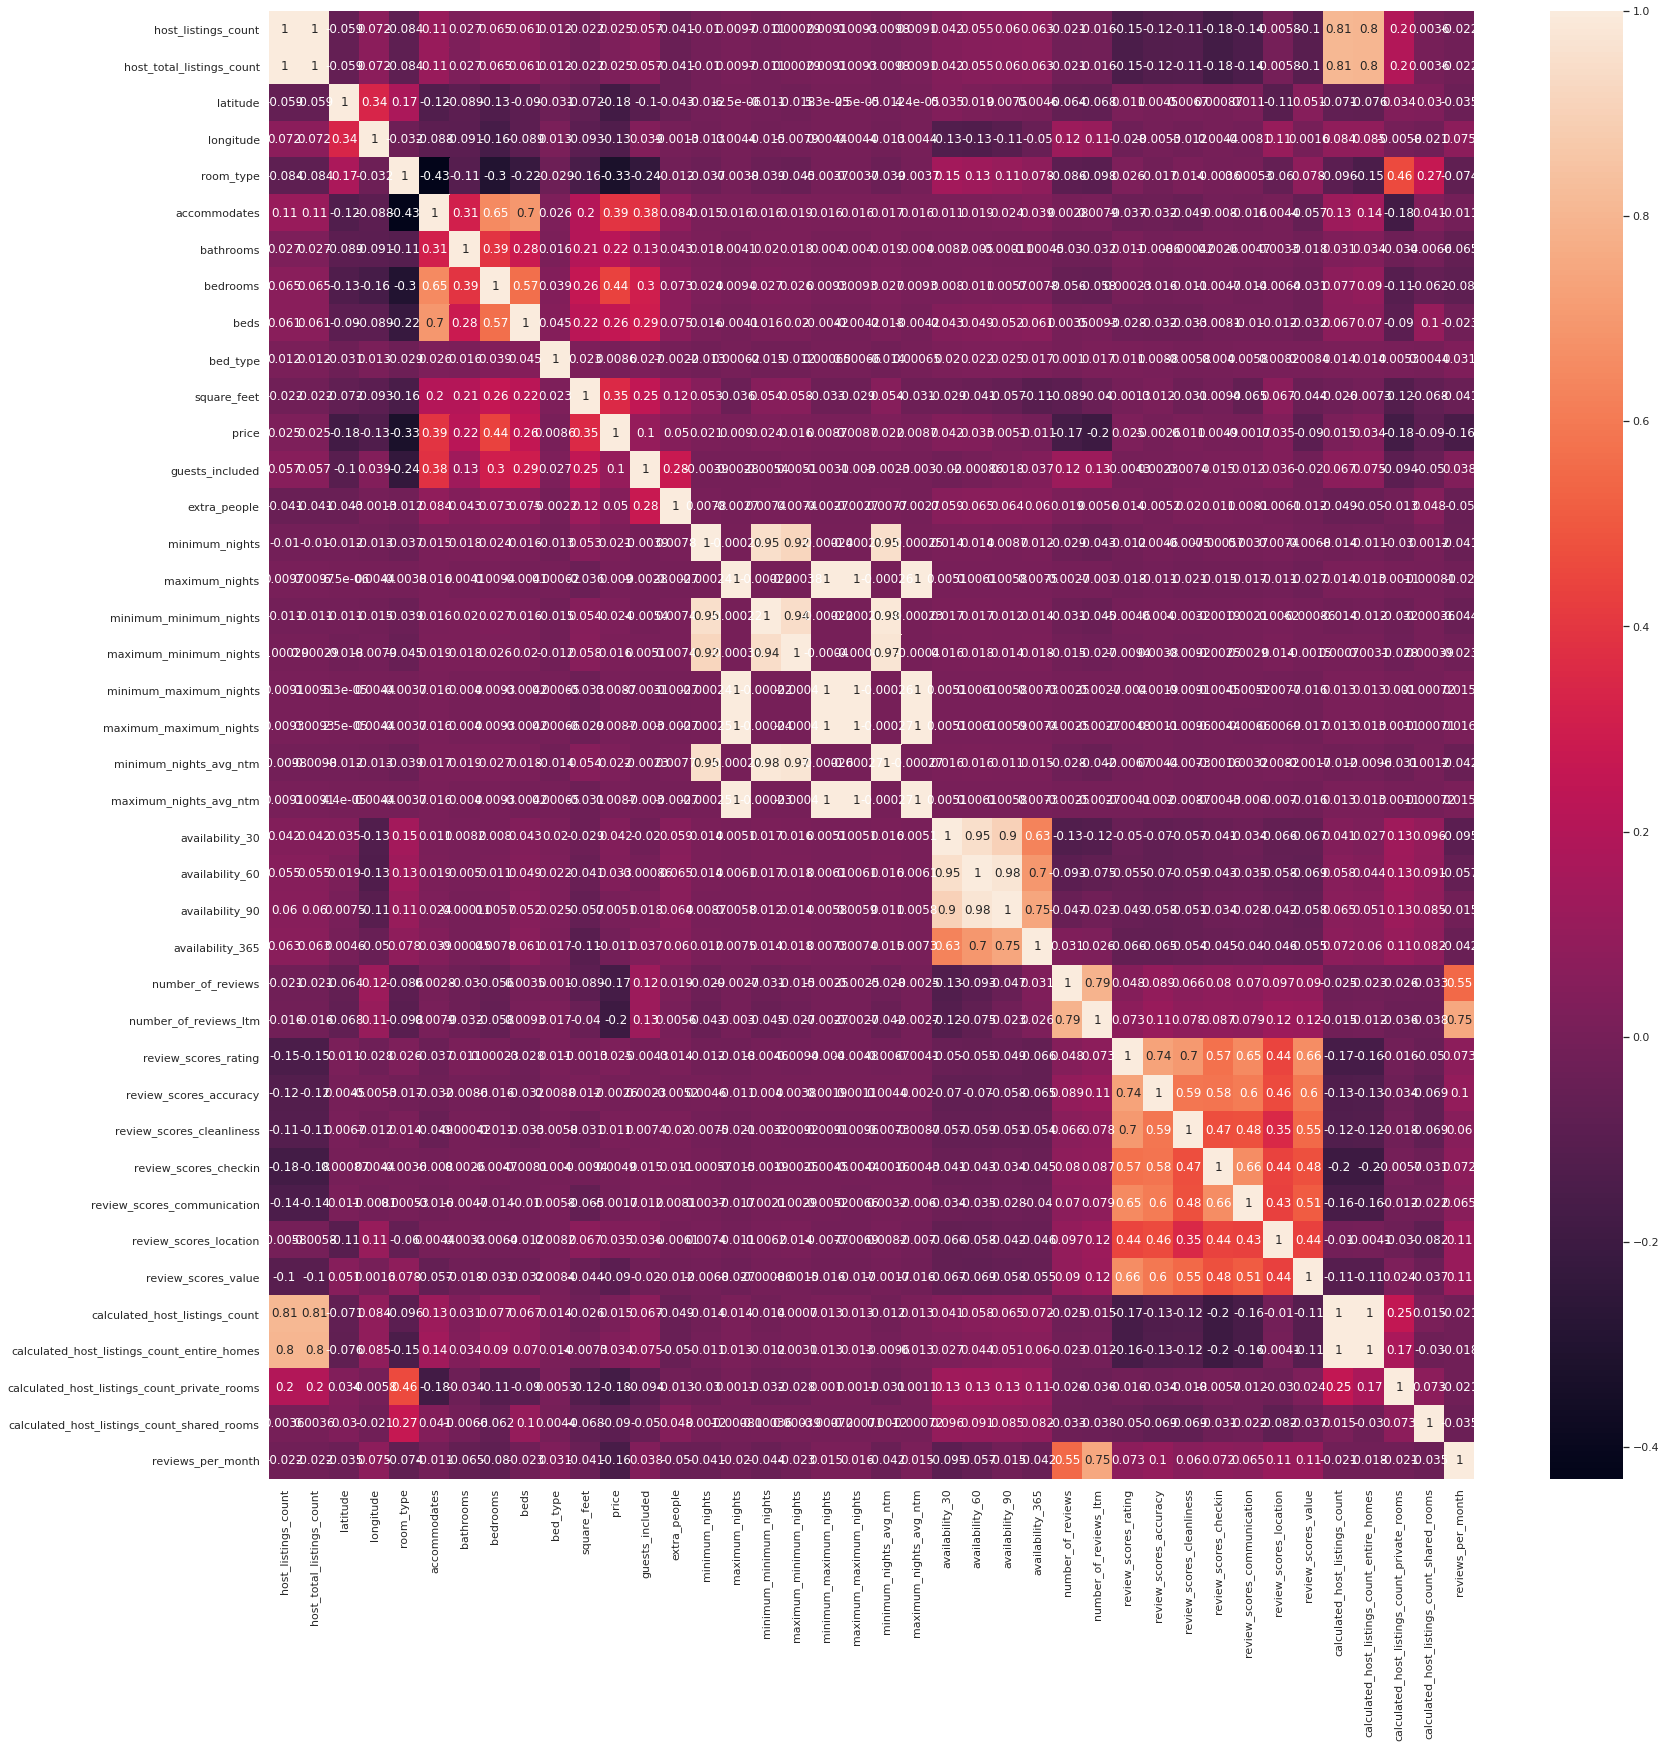

In [27]:
import seaborn as sns
plt.figure(figsize=(27,27))
sns.heatmap(ds.corr(), annot=True)

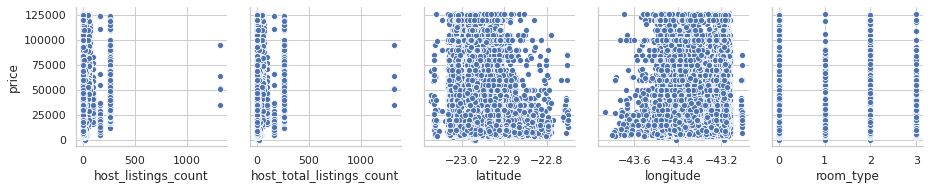

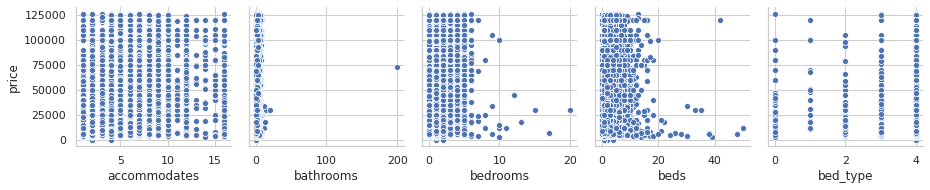

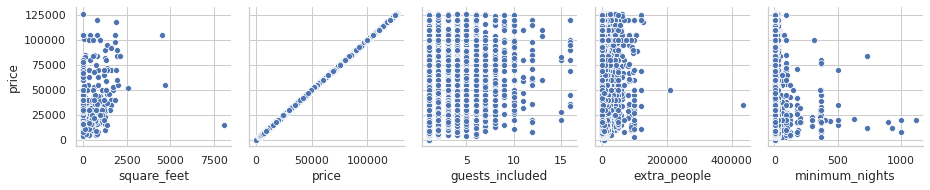

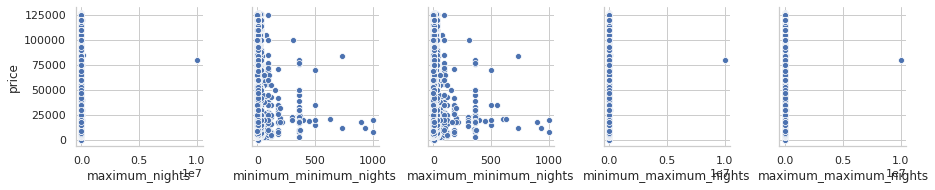

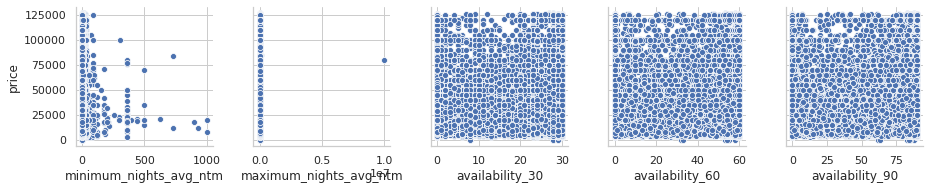

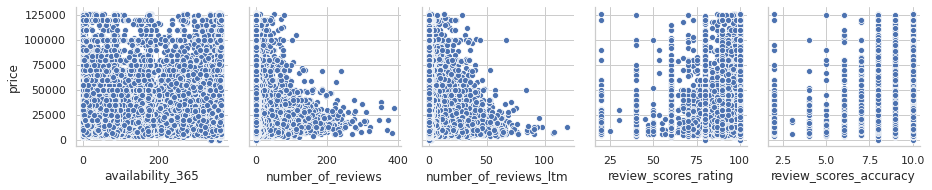

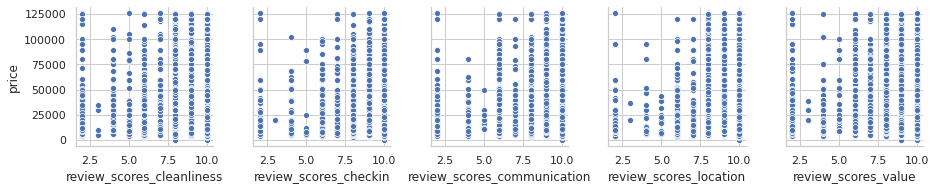

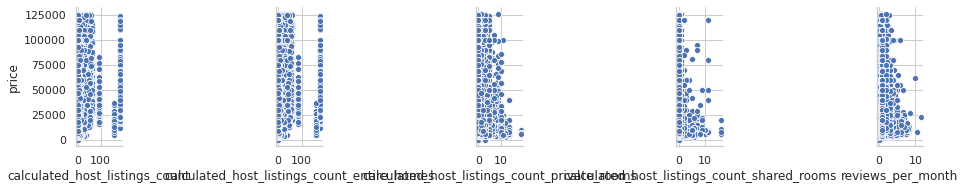

In [28]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

In [0]:
ds["accommodates"] = pd.to_numeric(ds["accommodates"], errors= "ignore")
ds["bathrooms"] = pd.to_numeric(ds["bathrooms"], errors= "ignore")
ds["bedrooms"] = pd.to_numeric(ds["bedrooms"], errors= "ignore")
ds["beds"] = pd.to_numeric(ds["beds"], errors= "ignore")
ds["room_type"] = pd.to_numeric(ds["room_type"], errors= "ignore")

ds["review_scores_location"] = pd.to_numeric(ds["review_scores_location"], errors= "ignore")

In [0]:
#ds = ds.replace(numpy.nan, 0.0001)
#ds = ds.replace(0, 0.0001)
ds = ds.dropna()

In [0]:
#x = ds.drop("price", axis = 1)
#columns = ['review_score_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location']
x = ds[['accommodates', 'bathrooms','bedrooms','beds','room_type']]
y = ds["price"]

In [32]:
x.isnull().any()
x.shape

(49, 5)

In [33]:
y.isnull().any()
y.shape

(49,)

In [34]:
x

,accommodates,bathrooms,bedrooms,beds,room_type
7,1,1.0,1.0,1.0,2
85,4,1.0,0.0,3.0,0
102,2,1.5,1.0,1.0,2
147,4,2.5,2.0,2.0,0
180,2,1.0,0.0,4.0,0
225,2,1.0,1.0,1.0,0
228,8,2.0,2.0,5.0,0
246,2,1.0,1.0,1.0,2
280,4,1.0,1.0,4.0,0
299,3,1.0,0.0,3.0,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

# rkf.split(X)
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)
#random_state = 12883823
#rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
#x_train, x_test,y_train,y_test = rkf.split(x)

In [36]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#rf = RandomForestRegressor(n_estimators = 1500, verbose=1, criterion='mse')
rf = linear_model.LinearRegression()
rf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
x_test

,accommodates,bathrooms,bedrooms,beds,room_type
833,1,2.0,1.0,1.0,2
1423,6,1.0,2.0,2.0,0
246,2,1.0,1.0,1.0,2
102,2,1.5,1.0,1.0,2
1637,5,2.0,1.0,3.0,0
228,8,2.0,2.0,5.0,0
1500,6,3.0,4.0,5.0,0
1884,4,1.5,1.0,4.0,0
85,4,1.0,0.0,3.0,0
1535,4,1.5,2.0,4.0,0


In [0]:
pred = rf.predict(x_test)

In [39]:
print("Conjunto de predições:\n {}".format(pred))

Conjunto de predições:
 [20285.26521441 30021.3664036  13620.45812591 17459.95743224
 29945.4318451  36539.02327943 53544.6389477  24028.49941957
 15574.74165633 29705.99947154 12606.26660176 29804.09961332
 14683.69972096 12606.26660176 41251.38187813]


In [40]:

# coeficientes
print('Coeficientes: \n', rf.coef_)
# mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))
# Coeficiente de determinação: 1 é a predição perfeita
print('Coeficiente de determinação: %.2f'
      % r2_score(y_test, pred))

Coeficientes: 
 [ 1014.19152415  7678.99861265  5677.50005196 -1063.24159504
 -3864.94186208]
Mean squared error: 569801841.02
Coeficiente de determinação: 0.38


In [41]:
pred.shape

(15,)

In [42]:
x_test.shape

(15, 5)

In [43]:
y_test.shape

(15,)

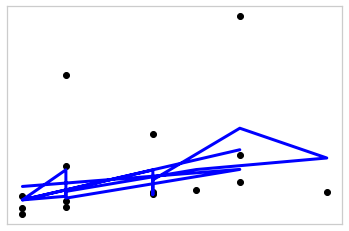

In [44]:
plt.scatter(x_test['accommodates'], y_test,  color='black')
plt.plot(x_test['accommodates'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

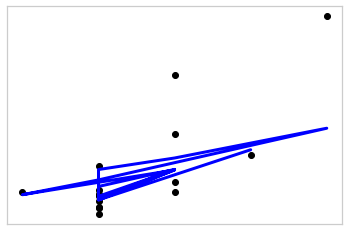

In [45]:
plt.scatter(x_test['bedrooms'], y_test,  color='black')
plt.plot(x_test['bedrooms'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [46]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.38397225864196705


In [0]:
x = ds[['accommodates', 'bathrooms','bedrooms','beds', 'room_type']]
y = ds["price"]

In [0]:
x = x.fillna(method='ffill')
y = y.fillna(method='ffill')

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [51]:
modelo_regressaoLog = LogisticRegression(C = 0.7, random_state = 42)
modelo_regressaoLog.fit(x_train, y_train.ravel())

regressao_log_predict_test = modelo_regressaoLog.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, regressao_log_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, regressao_log_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.0000

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       0.0
   macro avg       0.00      0.00      0.00       0.0
weighted avg       0.00      0.00      0.00       0.0



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: Und